In [347]:
import numpy as np
from hmmlearn import hmm

# Task 1
Write a program to implement Needleman-Wunsch for proteins
- You will need the blosum50 scoring matrix
- You can use any programming language
- Run this on HEAGAWGHEE versus PAWHEAE
- Compare this to page 23 in lecture 5
- Match the protein sequence SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL with PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY

In [348]:
# read blosum50 matrix
blosum50_matrix = np.loadtxt('./blosum50.txt')
def blosumtodict(blosum50_matrix):
    blosum50_dict = {}
    string_list = 'ARNDCQEGHILKMFPSTWYV'
    for i, ichar in enumerate(string_list):
        for j, jchar in enumerate(string_list):
            blosum50_dict[(ichar, jchar)] = blosum50_matrix[i, j]
    return blosum50_dict
blosum50 = blosumtodict(blosum50_matrix)

In [349]:
def needleman_wunsch(string_a, string_b, d, s_dict):
    F = np.zeros((len(string_a)+1, len(string_b)+1))
    for i,j in np.ndindex(F.shape):
        if i == 0:
            F[0, j] = d * j
        elif j == 0:
            F[i, 0] = d * i
        elif (i > 0 and j > 0):
            match = F[i-1, j-1] + s_dict[(string_a[i-1], string_b[j-1])]
            delete = F[i-1, j] + d
            insert = F[i, j-1] + d
            F[i, j] = max(match, delete, insert)
    alignment_a = ''
    alignment_b = ''
    i = len(string_a)
    j = len(string_b)
    while (i > 0 or j > 0):
        if (i > 0 and j > 0 and F[i, j] == F[i-1,j-1] + s_dict[(string_a[i-1], string_b[j-1])]):
            alignment_a = string_a[i-1] + alignment_a
            alignment_b = string_b[j-1] + alignment_b
            i = i - 1
            j = j - 1
        elif (i > 0 and F[i, j] == F[i-1, j] + d):
            alignment_a = string_a[i-1] + alignment_a
            alignment_b = '-' + alignment_b
            i = i - 1
        else:
            alignment_a = '-' + alignment_a
            alignment_b = string_b[j-1] + alignment_b
            j = j - 1
            
    return alignment_a, alignment_b

In [350]:
# HEAGAWGHEE vs PAWHEAE
needleman_wunsch('HEAGAWGHEE', 'PAWHEAE', -8, blosum50)

('HEAGAWGHE-E', '--P-AW-HEAE')

In [351]:
# SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL vs PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY
needleman_wunsch('SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL', 'PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY', -8, blosum50)

('-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-', 'PSPTMEAVTSVEA-STASHPHSTSSYFATTYYHLY')

# Task 2
Modify your program to implement the Smith-Waterman algorithm
- Again run this on HEAGAWGHEE versus PAWHEAE
- Compare this to page 5 in lecture 6
- Find the best local match between MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY and TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI

In [352]:
def smith_waterman(string_a, string_b, d, s_dict):
    F = np.zeros((len(string_a)+1, len(string_b)+1))
    for i,j in np.ndindex(F.shape):
        if i == 0:
            F[0, j] = 0
        elif j == 0:
            F[i, 0] = 0
        elif (i > 0 and j > 0):
            match = F[i-1, j-1] + s_dict[(string_a[i-1], string_b[j-1])]
            delete = F[i-1, j] + d
            insert = F[i, j-1] + d
            F[i, j] = max(0, match, delete, insert)
    alignment_a = ''
    alignment_b = ''
    i, j = np.unravel_index(F.argmax(), F.shape)
    while (F[i, j] != 0):
        if (i > 0 and j > 0 and F[i, j] == F[i-1,j-1] + s_dict[(string_a[i-1], string_b[j-1])]):
            alignment_a = string_a[i-1] + alignment_a
            alignment_b = string_b[j-1] + alignment_b
            i = i - 1
            j = j - 1
        elif (i > 0 and F[i, j] == F[i-1, j] + d):
            alignment_a = string_a[i-1] + alignment_a
            alignment_b = '-' + alignment_b
            i = i - 1
        else:
            alignment_a = '-' + alignment_a
            alignment_b = string_b[j-1] + alignment_b
            j = j - 1            
    return alignment_a, alignment_b

In [353]:
# HEAGAWGHEE vs PAWHEAE
smith_waterman('HEAGAWGHEE', 'PAWHEAE', -8, blosum50)

('AWGHE', 'AW-HE')

In [354]:
# MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY vs 
# TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI
smith_waterman('MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY', 
               'TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI', -8, blosum50)

('HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI',
 'HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI')

## Task 4
Program the following HMM to generate CG rich regions
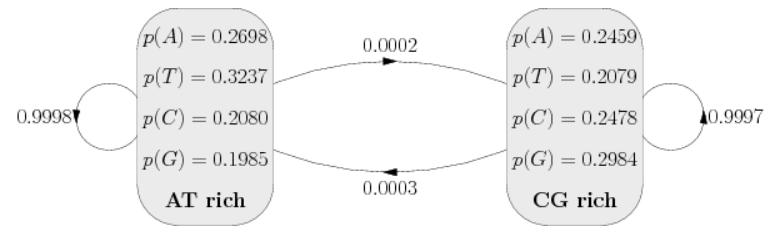

In [364]:
states = ('AT rich', 'CG rich')
observations = ('A', 'T', 'C', 'G')
start_probability = {'AT rich': 0.5, 'CG rich': 0.5}
transition_probability = {
    'AT rich' : {'AT rich': 0.9998, 'CG rich': 0.0002},
    'CG rich' : {'AT rich': 0.0003, 'CG rich': 0.9997}
}
emission_probability = {
    'AT rich' : {'A': 0.2698, 'T': 0.3237, 'C': 0.2080, 'G': 0.1985},
    'CG rich' : {'A': 0.2459, 'T': 0.2079, 'C': 0.2478, 'G': 0.2984}
}

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.5, 0.5])
model.transmat_ = np.array([[0.9998, 0.0002],
                           [0.0003, 0.9997]])
model.emissionprob_ = np.array([[0.2698, 0.3237, 0.2080, 0.1985],
                               [0.2459, 0.2079, 0.2478, 0.2984]])
print(model.startprob_.shape)
print(model.transmat_.shape)
print(model.emissionprob_.shape)

(2,)
(2, 2)
(2, 4)


## Task 5
Write a viterbi algorithm for finding the most likely CG regions and find a way of drawing this

In [413]:
model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([0.5, 0.5])
model.transmat_ = np.array([[0.9998, 0.0002],
                           [0.0003, 0.9997]])
model.emissionprob_ = np.array([[0.2698, 0.3237, 0.2080, 0.1985],
                               [0.2459, 0.2079, 0.2478, 0.2984]])

def logviterbi(sequence, model):
    # Based on 'https://en.wikipedia.org/wiki/Viterbi_algorithm'
    # integer assignments to nucleotide bases for easier index access
    nucleotides_dict = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
    states_dict = {0: 'AT', 1: 'CG'}
    # change all probability to log
    model.startprob_ = np.log(model.startprob_)
    model.transmat_ = np.log(model.transmat_)
    model.emissionprob_ = np.log(model.emissionprob_)
    
    # number of states
    K = model.n_components
    # length of observation sequence
    T = len(sequence)
    
    T1 = np.empty((K, T), 'd')
    T2 = np.empty((K, T), 'B')
    
    # initial probabilities for first observation
    T1[:, 0] = model.startprob_ + model.emissionprob_[:, nucleotides_dict[sequence[0]]]
    T2[:, 0] = 0
    
    for i in range(1, T):
        probability = T1[np.newaxis, :, i-1].T + model.transmat_
        T1[:, i] = model.emissionprob_[:, nucleotides_dict[sequence[i]]] + np.max(probability, axis=1)
        print(T1[:, i])
        T2[:, i] = np.argmax(T1[:, i], axis=0)
        print(T2[:, i])
    
    print(T1)
    print(T2)
    
    # output sequence
    z = np.empty(T, 'B')
    x = np.empty(T, dtype='<U2')
    z[-1] = np.argmax(T1[:, T-1])
    x[-1] = states_dict[z[-1]]
    for i in reversed(range(1, T)):
        z[i-1] = T2[z[i], i]
        x[i-1] = states_dict[z[i-1]]
    
    return x
    
logviterbi('CATCGTCGA', model)
    

[-3.57363874 -3.49141087]
[1 1]
[-4.70177687 -5.06240899]
[0 0]
[-6.27219409 -6.45784235]
[0 0]
[-7.88936029 -7.6674628 ]
[1 1]
[-9.01749843 -9.23846093]
[0 0]
[-10.58791565 -10.63389429]
[0 0]
[-12.20508185 -11.84351474]
[1 1]
[-13.5153562  -13.24664512]
[1 1]
[[ -2.26336438  -3.57363874  -4.70177687  -6.27219409  -7.88936029
   -9.01749843 -10.58791565 -12.20508185 -13.5153562 ]
 [ -2.08828049  -3.49141087  -5.06240899  -6.45784235  -7.6674628
   -9.23846093 -10.63389429 -11.84351474 -13.24664512]]
[[0 1 0 0 1 0 0 1 1]
 [0 1 0 0 1 0 0 1 1]]


array(['CG', 'AT', 'AT', 'CG', 'AT', 'AT', 'CG', 'CG', 'CG'], dtype='<U2')

## Task 6
Run this on the genome for the phase lambda or here